
=== System Efficiency 2025-05 Days 1-31 (weekdays) ===
min     -3.52
mean     4.39
max     11.18
Name: SYSTEM_EFF_KWRT, dtype: float64
Saved: C:\Users\QiYangWong\Downloads\Amcorp Pic\SystemEff_weekdays_2025-05_Days1-31.png


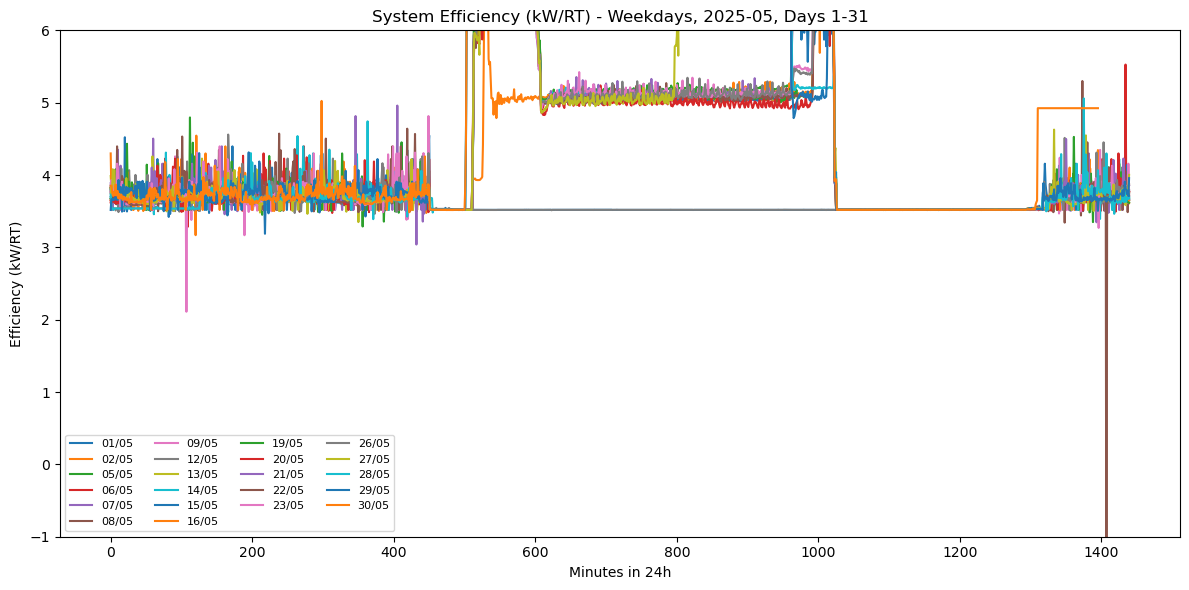


=== System Efficiency 2025-05 Days 1-31 (weekends) ===
min     3.17
mean    3.77
max     7.10
Name: SYSTEM_EFF_KWRT, dtype: float64
Saved: C:\Users\QiYangWong\Downloads\Amcorp Pic\SystemEff_weekends_2025-05_Days1-31.png


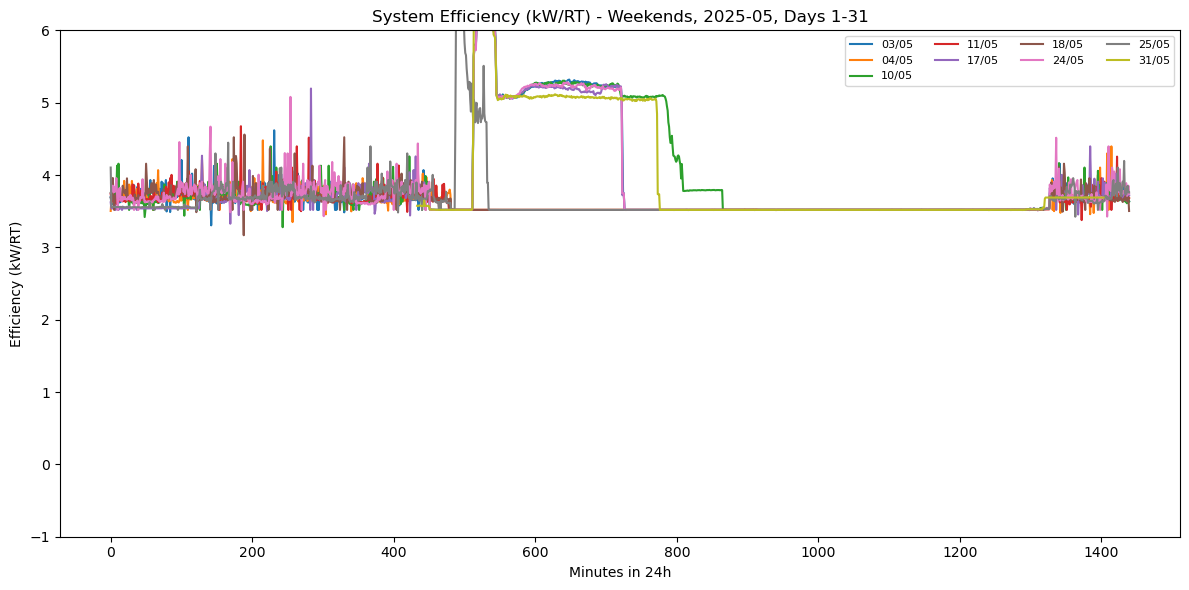


=== System Efficiency 2025-06 Days 1-30 (weekdays) ===
min     2.34
mean     inf
max      inf
Name: SYSTEM_EFF_KWRT, dtype: float64
Saved: C:\Users\QiYangWong\Downloads\Amcorp Pic\SystemEff_weekdays_2025-06_Days1-30.png


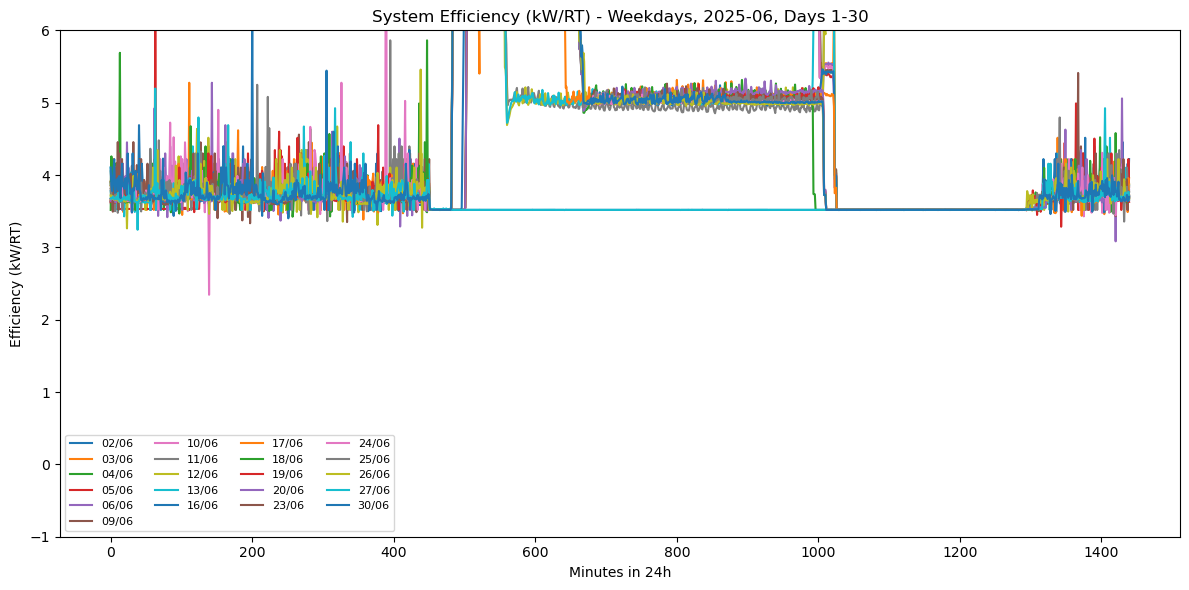


=== System Efficiency 2025-06 Days 1-30 (weekends) ===
min     -3.52
mean     3.76
max     10.55
Name: SYSTEM_EFF_KWRT, dtype: float64
Saved: C:\Users\QiYangWong\Downloads\Amcorp Pic\SystemEff_weekends_2025-06_Days1-30.png


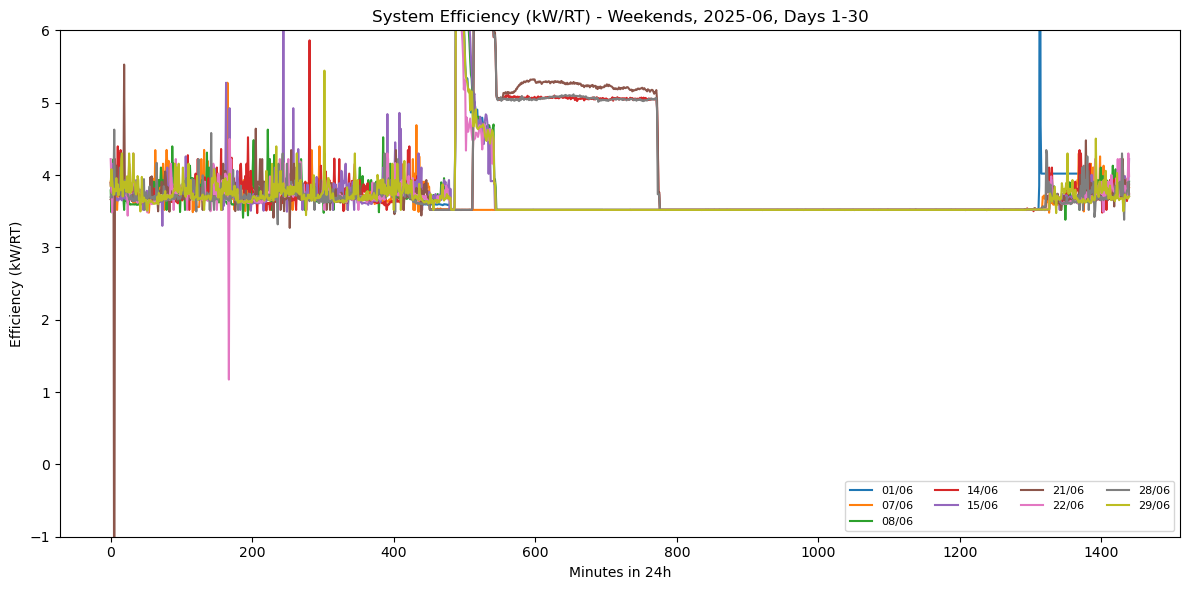


=== System Efficiency 2025-07 Days 1-31 (weekdays) ===
min     3.05
mean     inf
max      inf
Name: SYSTEM_EFF_KWRT, dtype: float64
Saved: C:\Users\QiYangWong\Downloads\Amcorp Pic\SystemEff_weekdays_2025-07_Days1-31.png


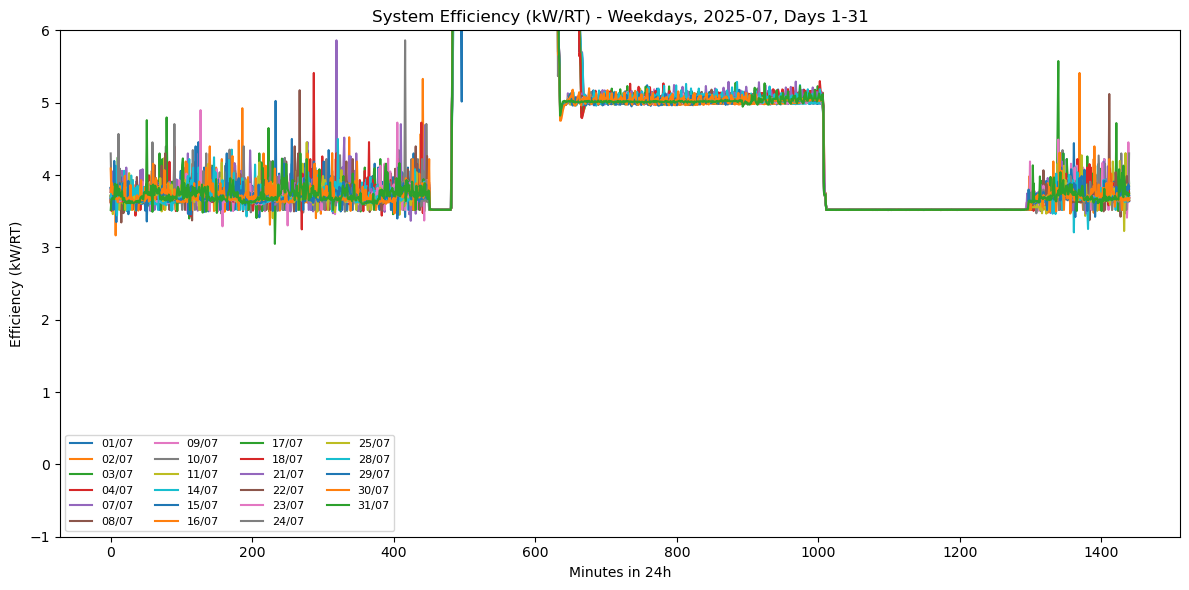


=== System Efficiency 2025-07 Days 1-31 (weekends) ===
min    -3.52
mean    3.81
max     7.12
Name: SYSTEM_EFF_KWRT, dtype: float64
Saved: C:\Users\QiYangWong\Downloads\Amcorp Pic\SystemEff_weekends_2025-07_Days1-31.png


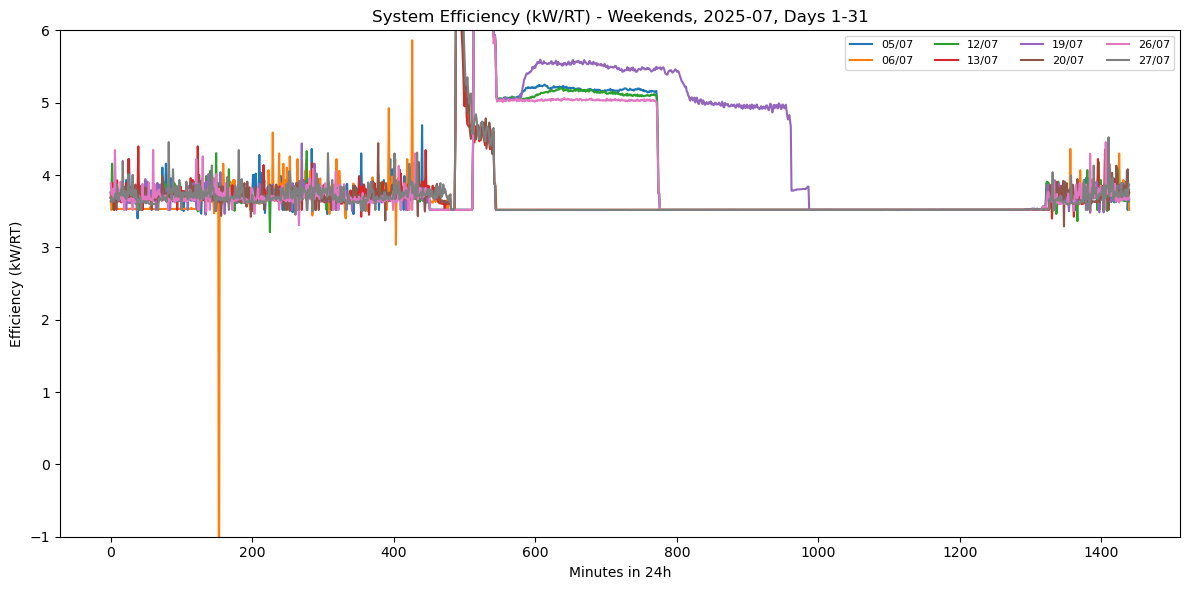


=== System Efficiency 2025-08 Days 1-31 (weekdays) ===
min    -52.76
mean      inf
max       inf
Name: SYSTEM_EFF_KWRT, dtype: float64
Saved: C:\Users\QiYangWong\Downloads\Amcorp Pic\SystemEff_weekdays_2025-08_Days1-31.png


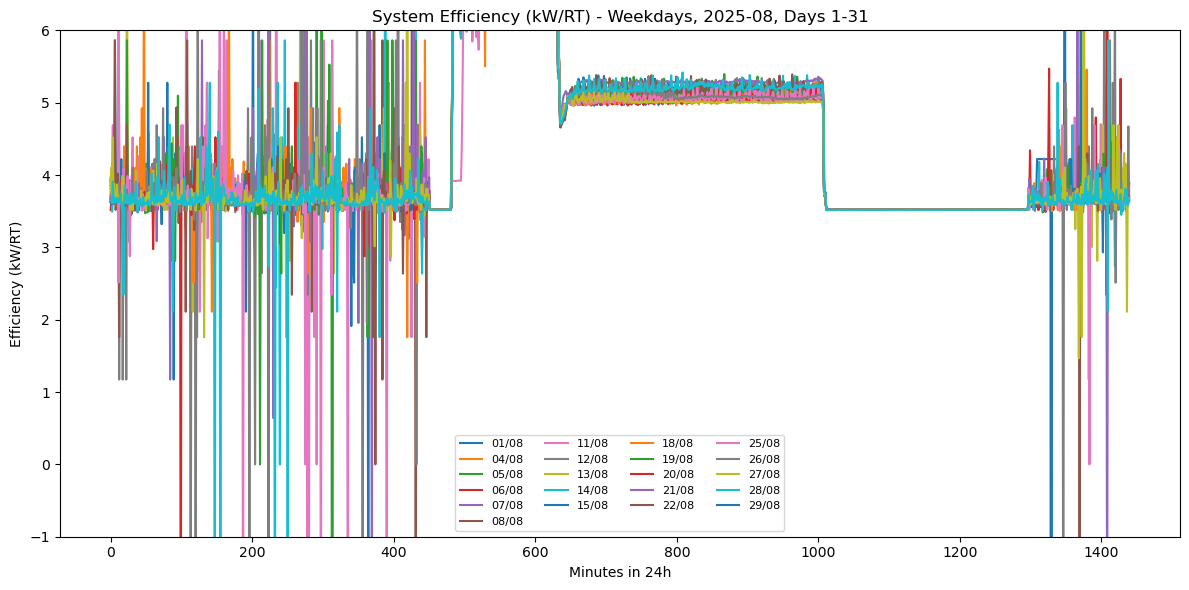


=== System Efficiency 2025-08 Days 1-31 (weekends) ===
min    -6.59
mean     inf
max      inf
Name: SYSTEM_EFF_KWRT, dtype: float64
Saved: C:\Users\QiYangWong\Downloads\Amcorp Pic\SystemEff_weekends_2025-08_Days1-31.png


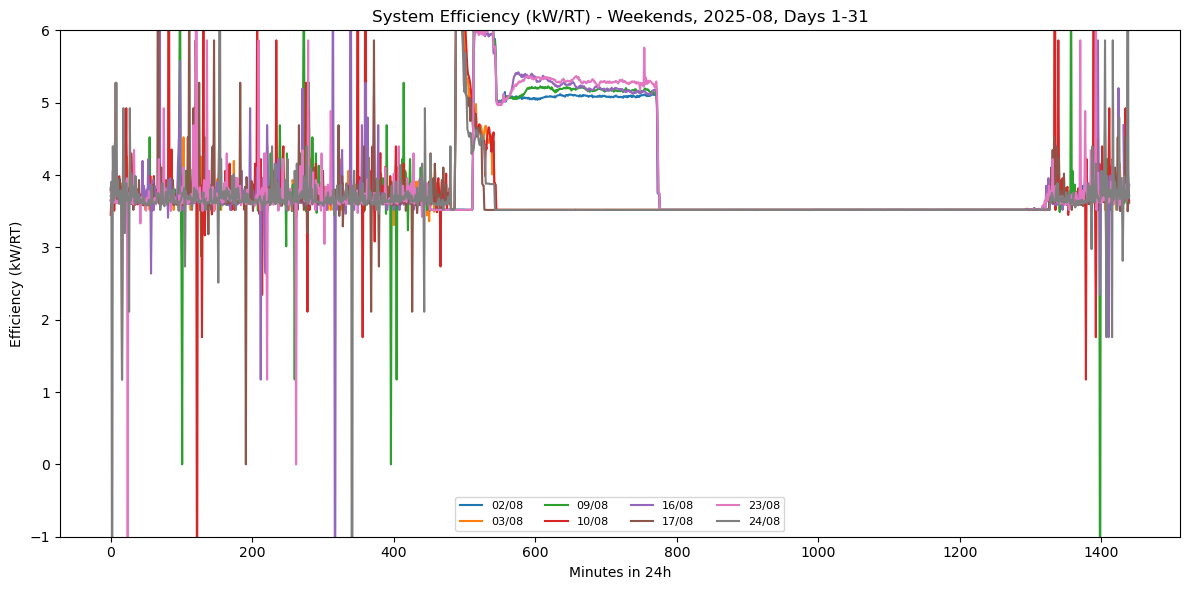

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar
import os

import os
open(r"C:\Users\QiYangWong\Downloads\Amcorp Pic\test.txt", "w").write("ok")

file_path = r"C:\Users\QiYangWong\Downloads\merged_updated_v5.csv"  
df = pd.read_csv(file_path, low_memory=False)

if str(df.columns[0]).startswith("Unnamed"):
    df.columns = df.iloc[0]
    df = df.drop(0).reset_index(drop=True)

df["timestamp"] = pd.to_datetime(
    df["Date"] + " " + df["Time"],
    format="%d/%m/%Y %H:%M:%S",
    errors="coerce"
)
df = df.drop(columns=["Date","Time"])
df = df.set_index("timestamp").sort_index()

df = df.apply(pd.to_numeric, errors="coerce")


df["RT_CH123"] = df["Power_CH123"] / 3.517
df["SYSTEM_EFF_KWRT"] = df["Total_Power"] / df["RT_CH123"]

def plot_system_efficiency(df, year=2025, month=6, mode="all", save_path=None, show_in_notebook=True):
    if "SYSTEM_EFF_KWRT" not in df.columns:
        print(" SYSTEM_EFF_KWRT column not found.")
        return
    
    _, last = calendar.monthrange(year, month)
    month_df = df[(df.index.year == year) & (df.index.month == month)]
    if month_df.empty:
        print(f"No data found for {year}-{month:02d}")
        return
    
    if mode == "weekends":
        sub = month_df[month_df.index.weekday >= 5]
    elif mode == "weekdays":
        sub = month_df[month_df.index.weekday < 5]
    else:
        sub = month_df.copy()
    
    if sub.empty:
        print(f"No {mode} data found for {year}-{month:02d}")
        return

    if mode == "all":
        chunks = [(1,10), (11,20), (21,31)]
    else:
        chunks = [(1,last)]

    for (start,end) in chunks:
        sub_chunk = sub[(sub.index.day >= start) & (sub.index.day <= end)]
        if sub_chunk.empty:
            continue

        stats = sub_chunk["SYSTEM_EFF_KWRT"].describe().loc[["min","mean","max"]].round(2)
        print(f"\n=== System Efficiency {year}-{month:02d} Days {start}-{end} ({mode}) ===")
        print(stats)

        fig, ax = plt.subplots(figsize=(12,6))
        for d,g in sub_chunk.groupby(sub_chunk.index.date):
            minutes = g.index.hour*60 + g.index.minute
            ax.plot(minutes, g["SYSTEM_EFF_KWRT"], label=f"{d:%d/%m}")

        ax.set_title(f"System Efficiency (kW/RT) - {mode.title()}, {year}-{month:02d}, Days {start}-{end}")
        ax.set_xlabel("Minutes in 24h")
        ax.set_ylabel("Efficiency (kW/RT)")
        ax.set_ylim(-1, 6)   # restrict y-axis range
        ax.legend(ncol=4, fontsize=8)
        plt.tight_layout()

        if save_path:
            os.makedirs(save_path, exist_ok=True)
            filename = os.path.join(
                save_path,
                f"SystemEff_{mode}_{year}-{month:02d}_Days{start}-{end}.png"
            )
            fig.savefig(filename, dpi=300, bbox_inches="tight", facecolor="white")
            print(f"Saved: {filename}")

        if show_in_notebook:
            plt.show()
        else:
            plt.close(fig)


save_folder = r"C:\Users\QiYangWong\Downloads\Amcorp Pic"

plot_system_efficiency(df, year=2025, month=5, mode="weekdays", save_path=save_folder)
plot_system_efficiency(df, year=2025, month=5, mode="weekends", save_path=save_folder)

plot_system_efficiency(df, year=2025, month=6, mode="weekdays", save_path=save_folder)
plot_system_efficiency(df, year=2025, month=6, mode="weekends", save_path=save_folder)

plot_system_efficiency(df, year=2025, month=7, mode="weekdays", save_path=save_folder)
plot_system_efficiency(df, year=2025, month=7, mode="weekends", save_path=save_folder)

plot_system_efficiency(df, year=2025, month=8, mode="weekdays", save_path=save_folder)
plot_system_efficiency(df, year=2025, month=8, mode="weekends", save_path=save_folder)